### TP : Traitement du Signal
## Objectif

L'objectif de ce TP est de mesurer la vitesse du son en utilisant le matériel fourni.

## Matériel

- Haut-parleur
- Deux microphones
- Ordinateur avec Python et Jupyter Notebook installés

## Questions

1. Comment peut-on mesurer la vitesse du son ?
2. Comment isoler le signal émis par l'haut-parleur et comment peut-on minimiser les bruits captés par les microphones ?
3. Utiliser les différents signaux afin de déduire lequel est le plus qualitatif.

## Code

Voici le code Python à utiliser pour générer les signaux et enregistrer le son :

```
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitesignfip


traitesignfip.record_microphone("noise") #Acquisition du son des microphones durant 5 secondes, l'haut-parleur émet le son passé en argument pendant 1 seconde

rate, data = scipy.io.wavfile.read('enregistrement.wav')#Lecture du fichier où l'acquisition a été enregistrée 

data_right = data[:,1]
data_left = data[:,0]

#Ces deux lignes permettent de séparer les deux canaux (Left and Right) car chacun des 2 micros enregistre sur un canal différent. 
#Ainsi deux tableaux permettent de traiter les valeurs de chaque micro.
```


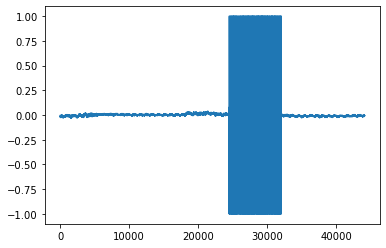

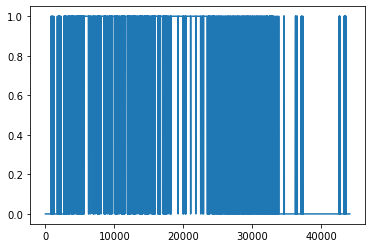

In [119]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

fs=44100
duration=1

analog = sd.rec(int(duration*fs),samplerate=fs,channels=1)
sd.wait()
digital = np.array(analog.flatten()>0,dtype=int)


plt.plot(analog)
plt.show()
digital = np.array(digital)
plt.plot(digital)
plt.show()

In [126]:
import comnumfip


plus = np.where(analog > 0.5)[0]
moins = np.where(analog < -0.5)[0]

print(plus)
print(moins)

print(comnumfip.sample_and_threshold(analog,44100,0.70))



[24497 24499 24500 ... 31977 31978 32004]
[24498 24543 24544 ... 32002 32003 32005]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Code python permettant de réaliser la mesure du son

Temps PIC Gauche : 3.5057596371882087
Temps PIC Droit : 3.5070521541950113
Delta : 0.0012925170068025515
Vitesse : 386.8421052632086 m/s


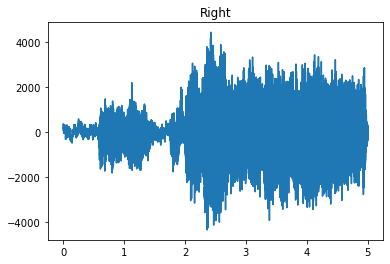

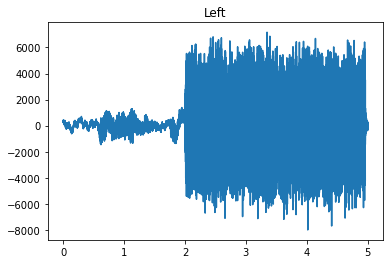

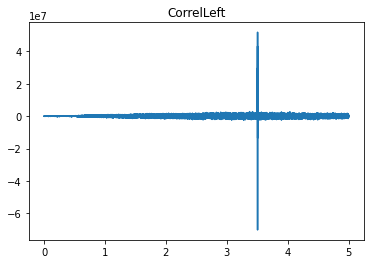

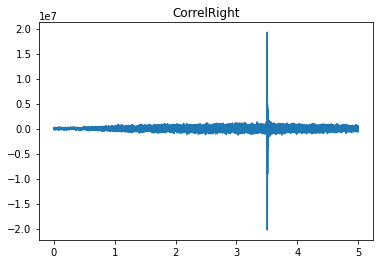

In [2]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitesignfip
from importlib import reload
reload(traitesignfip)

traitesignfip.record_microphone("noise",3)

rate, data = scipy.io.wavfile.read('enregistrement.wav')

fs = 44100 # fréquence d'échantillonage
N=len(data) #nombre d'échantillions 
n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 


distance=0.50


data_right = data[:,1]
data_left = data[:,0]

#affichage du channel 1 
plt.figure()
plt.title("Right")
plt.plot(n,data_right)
plt.figure()
plt.title("Left")
plt.plot(n,data_left)

# fc = 1000 # fréquence de coupure du filtre passe-bas
# b, a = sp.signal.butter(4, fc / (fs / 2), 'low')
# data_left_filtered = sp.signal.filtfilt(b, a, data_left)
# data_right_filtered = sp.signal.filtfilt(b, a, data_right)


corrLeft=np.correlate(data_left,traitesignfip.samples, mode='same')
corrRight=np.correlate(data_right,traitesignfip.samples, mode='same')
# Calcul de la corrélation croisée entre les deux signaux

plt.figure()
plt.title("CorrelLeft")
plt.plot(n,corrLeft)
#signal X
plt.figure()
plt.title("CorrelRight")
plt.plot(n,corrRight)
#signal X



# Trouver l'indice du maximum de la corrélation
max_index_Left = np.argmax(corrLeft)/fs
max_index_Right = np.argmax(corrRight)/fs

delta_t = delta = np.abs(max_index_Left - max_index_Right)

print("Temps PIC Gauche : "+str(max_index_Left))
print("Temps PIC Droit : "+str(max_index_Right))

print("Delta : "+str(delta_t))
print("Vitesse : "+str(distance/delta_t)+" m/s")
